In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [0]:
np.random.seed(1)
w = np.random.uniform(-1, 1, size = (10, 10, 2))
x = np.random.uniform(-1, 1, size = (1500, 2))
# print(x)

Topological distribution of neuron weight vectors before traing

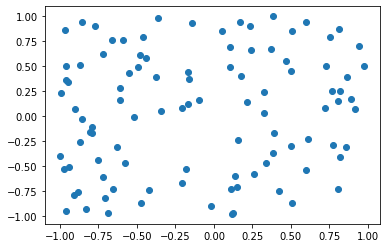

In [163]:
plt.scatter(w[:,:,0], w[:,:,1]) 
plt.show()

Function to return the indices of winner which would be at least distance from the example

In [0]:
def index(x1, w1):
  I = 0
  J = 0
  min_dis = float('inf')
  for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
      cur_dis = np.linalg.norm(w1[i,j,:] - x1)
      if min_dis > cur_dis:
        min_dis = cur_dis
        I,J = i,j
        # print(cur_dis,x1, w1[i,j,:])

  return I,J

Training using two heuristic sigma and alpha , where alpha is standard deviation parameter of the Gaussian distribution used for calculating neighbourhood for calculating exitations

In [0]:
alpha = 0.1
tow_1 = 1
tow_2 = 1
epoches = 100
#threshold is calulated using uniform distribution assumption
th_dis = (1-(-1))/w.shape[0]
sigma = 0.8
for n in range(epoches):
  alpha_n = alpha * np.exp(-n/tow_2)
  sigma_n = sigma * np.exp(-n/tow_1)
  dis = 0.0
  for xi in x:
    # print(xi)
    win_i, win_j = index(xi, w)
    #dis is the parameter used for deciding convergence of weights vectors of neurons
    dis = max(dis, np.linalg.norm(w[win_i,win_j,:] - xi))
    # print(dis)
    # updations are being made according to the neighbourhood
    for i in range(w.shape[0]):
      for j in range(w.shape[1]):
        w[i, j, :] += alpha_n * np.exp(-(np.linalg.norm(w[win_i,win_j,:] - w[i,j,:])**2)/(2 * sigma_n**2))*(xi - w[win_i,win_j,:])

  if dis < th_dis:
    break
  # print(n)
# print(w)
  

Ploting the weights after training, the neurons should topologically represent the data distribution

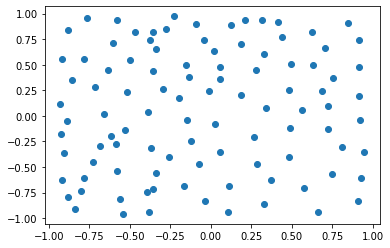

In [181]:
plt.scatter(w[:,:,0], w[:,:,1]) 
plt.show()

Testing the given data

In [182]:
test_data = np.array([[0.1, 0.8],[0.5, -0.2],[-0.8, -0.9],[-0.06, 0.9]])
out_data = []
for data in test_data:
  out_data.append(index(data, w))

for i in range(len(test_data)):
  print(test_data[i], w[out_data[i][0], out_data[i][1], :], np.linalg.norm(test_data[i] - w[out_data[i][0], out_data[i][1], :]))

[0.1 0.8] [0.12208265 0.89205037] 0.09466210575555233
[ 0.5 -0.2] [ 0.4877643  -0.11690557] 0.0839904552408877
[-0.8 -0.9] [-0.84017778 -0.91250782] 0.04207967786836527
[-0.06  0.9 ] [-0.08834542  0.89367109] 0.029043378231334262
